In [14]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [15]:
df = pd.read_csv("/Users/emilywu/Desktop/MMA/Text Analysis/Party_Animal_Steam_Review_Data_processed.csv")

In [6]:
df.head()

,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,...,steam_china_location,timestamp_dev_responded,developer_response,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played
0,157603005,english,Fun game to play when you've had a long day an...,1707077354,1707077354,True,0,0,0.0,0,...,NaN,NaN,NaN,76561199401546423,0,1,2027,322,1986,1707079884
1,157602265,english,Pros:\n-Animals\n-Party\n-Funny mechanics\n-A ...,1707076676,1707076676,True,0,0,0.0,0,...,NaN,NaN,NaN,76561198056822321,0,2,316,316,316,1707076353
2,157598111,english,10/10 Would drop kick a cat without feeling bad,1707072837,1707072837,True,0,1,0.0,0,...,NaN,NaN,NaN,76561198428748427,0,1,847,410,804,1707075660
3,157592673,english,"Very fun game. The animals are very cute, the ...",1707068019,1707068019,True,0,0,0.0,0,...,NaN,NaN,NaN,76561197987140501,0,10,7864,600,7712,1707109536
4,157588222,english,Game has been out for 4 months and they only a...,1707064205,1707064205,False,0,0,0.0,0,...,NaN,NaN,NaN,76561198024864749,375,17,1456,0,1456,1701029993


### POS taggin for fetching important attributes

In [17]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')



# Define a function to find patterns like adjective-noun and noun-adjective
def find_adj_noun_patterns(text):
    # Tokenize and POS tag
    tokens = word_tokenize(text)
    tags = nltk.pos_tag(tokens)
    
    # Look for patterns: adjective followed by a noun and noun followed by an adjective
    patterns = []
    for i in range(len(tags) - 1):
        word1, tag1 = tags[i]
        word2, tag2 = tags[i + 1]
        if (tag1 in ['JJ', 'JJR', 'JJS'] and tag2 in ['NN', 'NNS']) or \
           (tag1 in ['NN', 'NNS'] and tag2 in ['JJ', 'JJR', 'JJS']):
            patterns.append(word1 + ' ' + word2)
    return patterns

# Apply the function to each review
df['review'] = df['review'].astype(str)
df['attributes_patterns'] = df['review'].apply(find_adj_noun_patterns)

# Now, df['attributes_patterns'] contains the patterns for each review
print(df[['review', 'attributes_patterns']])


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/emilywu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /Users/emilywu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emilywu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                  review  \
0      Fun game to play when you've had a long day an...   
1      Pros:\n-Animals\n-Party\n-Funny mechanics\n-A ...   
2        10/10 Would drop kick a cat without feeling bad   
3      Very fun game. The animals are very cute, the ...   
4      Game has been out for 4 months and they only a...   
...                                                  ...   
10561  A Wildly Fun Time, But Penguins Are Missing!\n...   
10562                    Needs more penguins, great game   
10563  ---{ ☑Graphics☑ }---\n☐ You forget what realit...   
10564  I remember laughing this hard with friends in ...   
10565  [h1] Do Not Trust The Negative Reviews! [/h1]\...   

                                     attributes_patterns  
0                        [long day, fun easy, easy game]  
1      [-Funny mechanics, short while, ranked system,...  
2                                                     []  
3                       [fun game, new skin

In [13]:

# Save the DataFrame to a CSV file
output_file_path = '/Users/emilywu/Desktop/MMA/Text Analysis/POS_reviews.csv'  # Specify your file path here
df.to_csv(output_file_path, index=False)

print(f"DataFrame saved to {output_file_path}")


DataFrame saved to /Users/emilywu/Desktop/MMA/Text Analysis/POS_reviews.csv


In [12]:
from collections import Counter

#  df['attributes_patterns'] contains lists of (word1, word2) tuples as patterns

# Flatten all the lists in the column into one big list
all_patterns = [pattern for sublist in df['attributes_patterns'] for pattern in sublist]

# Count the occurrences of each pattern
pattern_counts = Counter(all_patterns)

# Get the top 100 most common patterns
top_100_patterns = pattern_counts.most_common(100)

# Convert top 50 patterns to a DataFrame for easier handling and viewing
top_100_df = pd.DataFrame(top_100_patterns, columns=['Pattern', 'Count'])

# You might want to save this to a CSV as well
top_100_df.to_csv('/Users/emilywu/Desktop/MMA/Text Analysis/top_50_attribute_patterns.csv', index=False)

# If you want to work with it within your code, you can also convert it to a dictionary
top_100_dict = dict(top_100_patterns)

# Now you have the top 50 patterns in both a DataFrame and a dictionary
print(top_100_df)


             Pattern  Count
0           fun game    310
1          good game    260
2       offline mode    185
3           much fun    178
4   negative reviews    176
..               ...    ...
95        silly game     14
96        first time     14
97         fun games     14
98     other animals     14
99        same thing     14

[100 rows x 2 columns]


In [13]:
output_file_path = '/Users/emilywu/Desktop/MMA/Text Analysis/top100_POS_reviews.csv'  # Specify your file path here
top_100_df.to_csv(output_file_path, index=False)

print(f"DataFrame saved to {output_file_path}")

DataFrame saved to /Users/emilywu/Desktop/MMA/Text Analysis/top100_POS_reviews.csv


In [22]:
df.columns

Index(['recommendationid', 'language', 'review', 'timestamp_created',
       'timestamp_updated', 'voted_up', 'votes_up', 'votes_funny',
       'weighted_vote_score', 'comment_count', 'steam_purchase',
       'received_for_free', 'written_during_early_access',
       'hidden_in_steam_china', 'steam_china_location',
       'timestamp_dev_responded', 'developer_response', 'steamid',
       'num_games_owned', 'num_reviews', 'playtime_forever',
       'playtime_last_two_weeks', 'playtime_at_review', 'last_played',
       'attributes_patterns'],
      dtype='object')

### User segmentation using KNN

In [23]:
#check missing values
import pandas as pd

# Assuming df is your DataFrame
columns = ['num_games_owned', 'num_reviews', 'playtime_forever', 'playtime_last_two_weeks', 'playtime_at_review', 'last_played']

# Checking for missing values in the specified columns
missing_values = df[columns].isnull().sum()

print(missing_values)


num_games_owned            0
num_reviews                0
playtime_forever           0
playtime_last_two_weeks    0
playtime_at_review         0
last_played                0
dtype: int64


/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

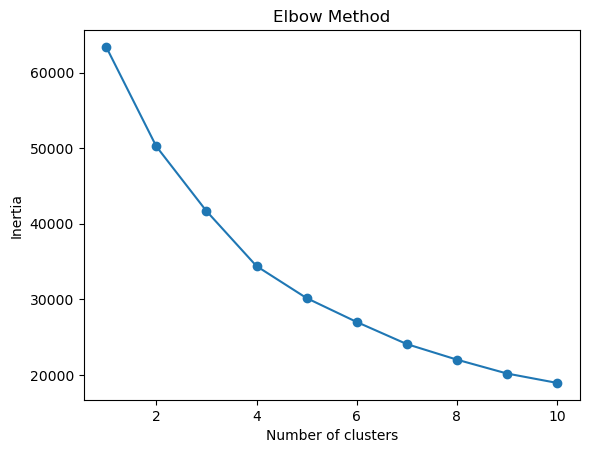

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


features = ['num_games_owned', 'num_reviews', 'playtime_forever', 'playtime_last_two_weeks', 'playtime_at_review', 'last_played']


# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Determining the number of clusters (k) - Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

#Plotting the Elbow Method 
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia, marker='o'); plt.title('Elbow Method'); plt.xlabel('Number of clusters'); plt.ylabel('Inertia'); plt.show()



/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 2, Silhouette Score: 0.64


/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 3, Silhouette Score: 0.31


/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 4, Silhouette Score: 0.32


/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 5, Silhouette Score: 0.33


/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 6, Silhouette Score: 0.34


/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 7, Silhouette Score: 0.35


/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 8, Silhouette Score: 0.36


/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 9, Silhouette Score: 0.36


/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 10, Silhouette Score: 0.34


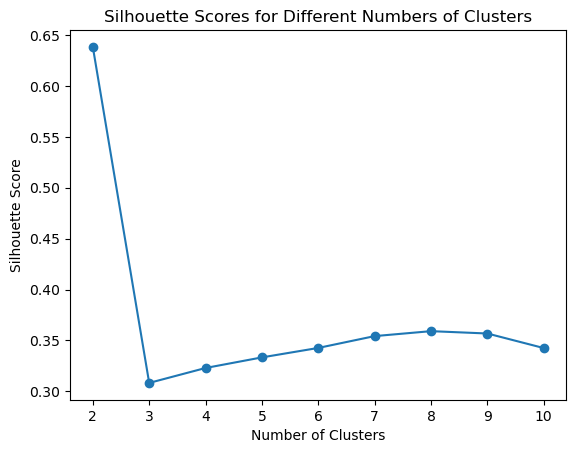

The optimal number of clusters is: 2


In [25]:
from sklearn.metrics import silhouette_score

# Assuming df_scaled is your standardized feature matrix from the previous step
range_n_clusters = list(range(2, 11))  # Starting from 2 since silhouette_score requires at least 2 clusters
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg:.2f}")

# Plotting the silhouette scores for different numbers of clusters
import matplotlib.pyplot as plt

plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Identify the optimal number of clusters as the one with the highest Silhouette Score
optimal_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters is: {optimal_n_clusters}")


In [26]:
# Choose the k after which the inertia decrease starts to diminish
k_optimal = 2  # Example, adjust based on your Elbow curve

# Clustering with the chosen k
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)




/Users/emilywu/anaconda3/envs/Conda_3117/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
#output as csv
output_file_path = '/Users/emilywu/Desktop/MMA/Text Analysis/user_segmentation.csv'  # Specify your file path here
df.to_csv(output_file_path, index=False)